In [1]:
!rm -f sonar.all-data.csv
!wget https://goo.gl/NXoJfR -O sonar.all-data.csv

--2018-01-29 01:38:52--  https://goo.gl/NXoJfR
Resolving goo.gl (goo.gl)... 172.217.9.174, 2607:f8b0:4000:814::200e
Connecting to goo.gl (goo.gl)|172.217.9.174|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data [following]
--2018-01-29 01:38:53--  https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.249
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.249|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87776 (86K) [text/plain]
Saving to: ‘sonar.all-data.csv’

100%[======================================>] 87,776      --.-K/s   in 0.1s    

2018-01-29 01:38:53 (659 KB/s) - ‘sonar.all-data.csv’ saved [87776/87776]



In [2]:
import numpy
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from pandas.tools.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [3]:
# Load dataset
url = 'sonar.all-data.csv'
dataset = read_csv(url, header=None)

In [4]:
#Whaddaya no.. 

In [5]:
dataset.shape

(208, 61)

In [8]:
dataset.dtypes

0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
14    float64
15    float64
16    float64
17    float64
18    float64
19    float64
20    float64
21    float64
22    float64
23    float64
24    float64
25    float64
26    float64
27    float64
28    float64
29    float64
       ...   
31    float64
32    float64
33    float64
34    float64
35    float64
36    float64
37    float64
38    float64
39    float64
40    float64
41    float64
42    float64
43    float64
44    float64
45    float64
46    float64
47    float64
48    float64
49    float64
50    float64
51    float64
52    float64
53    float64
54    float64
55    float64
56    float64
57    float64
58    float64
59    float64
60     object
dtype: object

In [9]:
#60 numbers in the range 0.0 to 1.0. 
#Each number represents the energy within a particular frequency band, integrated over a certain period of time. 
#The label associated with each record contains the letter R if the object is a rock and M if it is a mine (metal cylinder)
# binary classification say it is M or R

In [12]:
set_option('display.width', 100)# check more of what else you can tinker iwth.. using this.. 
dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [14]:
dataset.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [15]:
dataset.groupby(60).size()

60
M    111
R     97
dtype: int64

In [16]:
# uniform enough.. of samples.. for both M and R

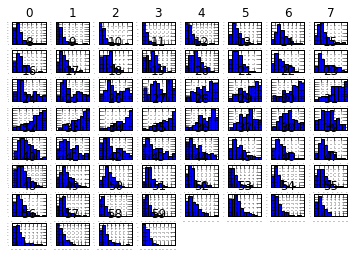

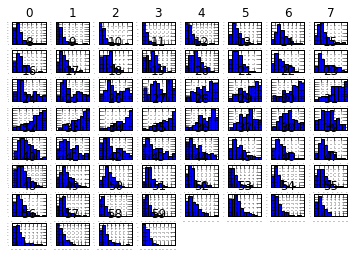

In [18]:
dataset.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1)
pyplot.show()

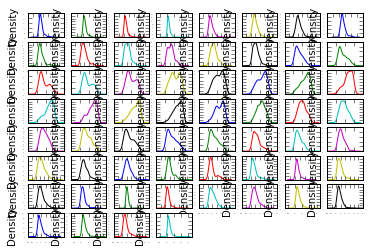

In [19]:
dataset.plot(kind='density', subplots=True, layout=(8,8), sharex=False, legend=False,fontsize=1)
pyplot.show()

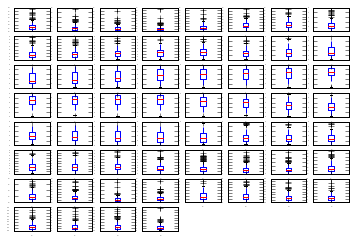

In [20]:
dataset.plot(kind='box', subplots=True, layout=(8,8), sharex=False, sharey=False,fontsize=1)
pyplot.show()

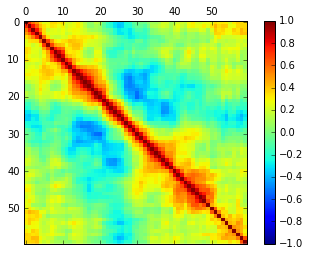

In [21]:
# correlation matrix
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(dataset.corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
pyplot.show()

In [ ]:
#there are 60.. over laod.. but then there is some stron correlation b/w a set of variables..

#The red around the diagonal suggests that attributes that are next to each other are generally more correlated with each other.   
#The blue patches also suggest some moderate negative correlation the further attributes are away from each other in the ordering.   
#This makes sense if the order of the attributes refers to the angle of sensors for the sonar chirp.  

In [22]:
# Split-out validation dataset
array = dataset.values
X = array[:,0:60].astype(float)
Y = array[:,60]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y,test_size=validation_size, random_state=seed)

In [23]:
# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = 'accuracy'

In [24]:
# Spot-Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [25]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.782721 (0.093796)
LDA: 0.746324 (0.117854)
KNN: 0.808088 (0.067507)
CART: 0.693750 (0.083466)
NB: 0.648897 (0.141868)
SVM: 0.608824 (0.118656)


In [26]:
# LR and KNN..
# observe.. how LR is pretty robust... :)

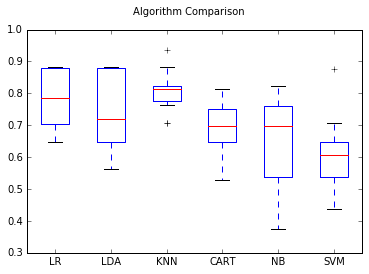

In [27]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [28]:
# much tightness.. KNN

In [29]:
# Standardize the dataset
# and reevalutate again...
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',LogisticRegression())])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA',LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN',KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART',DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB',GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])))

results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: 0.734191 (0.095885)
ScaledLDA: 0.746324 (0.117854)
ScaledKNN: 0.825735 (0.054511)
ScaledCART: 0.699265 (0.121243)
ScaledNB: 0.648897 (0.141868)
ScaledSVM: 0.836397 (0.088697)


In [30]:
# the score is accuracy..
# scaling.. helped.. SVM perform much better

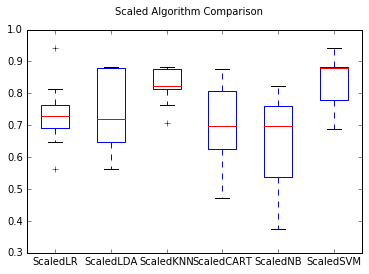

In [31]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [32]:
#hilarious.. the effects of standardization
# tuning and ensemble .. might give better resutls..

In [34]:
# Tune scaled KNN
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
neighbors = range (1,23)
param_grid = dict(n_neighbors=neighbors)
model = KNeighborsClassifier()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.849398 using {'n_neighbors': 1}
0.849398 (0.059881) with: {'n_neighbors': 1}
0.801205 (0.087869) with: {'n_neighbors': 2}
0.837349 (0.066303) with: {'n_neighbors': 3}
0.807229 (0.083938) with: {'n_neighbors': 4}
0.837349 (0.037500) with: {'n_neighbors': 5}
0.746988 (0.097200) with: {'n_neighbors': 6}
0.765060 (0.089510) with: {'n_neighbors': 7}
0.734940 (0.082291) with: {'n_neighbors': 8}
0.753012 (0.086979) with: {'n_neighbors': 9}
0.728916 (0.091367) with: {'n_neighbors': 10}
0.734940 (0.104890) with: {'n_neighbors': 11}
0.722892 (0.099478) with: {'n_neighbors': 12}
0.734940 (0.105836) with: {'n_neighbors': 13}
0.728916 (0.084700) with: {'n_neighbors': 14}
0.728916 (0.075873) with: {'n_neighbors': 15}
0.716867 (0.082917) with: {'n_neighbors': 16}
0.710843 (0.078716) with: {'n_neighbors': 17}
0.716867 (0.094291) with: {'n_neighbors': 18}
0.722892 (0.084555) with: {'n_neighbors': 19}
0.728916 (0.087022) with: {'n_neighbors': 20}
0.710843 (0.108829) with: {'n_neighbors': 21}
0.7

In [35]:
# funny.. N:neighbours = 1

In [36]:
# Tune scaled SVM
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0] # how is this arrived at..? judgement call..?
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C=c_values, kernel=kernel_values)
model = SVC()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.867470 using {'kernel': 'rbf', 'C': 1.5}
0.759036 (0.098863) with: {'kernel': 'linear', 'C': 0.1}
0.530120 (0.118780) with: {'kernel': 'poly', 'C': 0.1}
0.572289 (0.130339) with: {'kernel': 'rbf', 'C': 0.1}
0.704819 (0.066360) with: {'kernel': 'sigmoid', 'C': 0.1}
0.746988 (0.108913) with: {'kernel': 'linear', 'C': 0.3}
0.644578 (0.132290) with: {'kernel': 'poly', 'C': 0.3}
0.765060 (0.092312) with: {'kernel': 'rbf', 'C': 0.3}
0.734940 (0.054631) with: {'kernel': 'sigmoid', 'C': 0.3}
0.740964 (0.083035) with: {'kernel': 'linear', 'C': 0.5}
0.680723 (0.098638) with: {'kernel': 'poly', 'C': 0.5}
0.789157 (0.064316) with: {'kernel': 'rbf', 'C': 0.5}
0.746988 (0.059265) with: {'kernel': 'sigmoid', 'C': 0.5}
0.746988 (0.084525) with: {'kernel': 'linear', 'C': 0.7}
0.740964 (0.127960) with: {'kernel': 'poly', 'C': 0.7}
0.813253 (0.084886) with: {'kernel': 'rbf', 'C': 0.7}
0.753012 (0.058513) with: {'kernel': 'sigmoid', 'C': 0.7}
0.759036 (0.096940) with: {'kernel': 'linear', 'C': 0.9

In [37]:
# ensembles
ensembles = []
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier()))
ensembles.append(('ET', ExtraTreesClassifier()))
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

AB: 0.813971 (0.066017)
GBM: 0.847794 (0.100189)
RF: 0.777206 (0.076753)
ET: 0.746324 (0.086503)


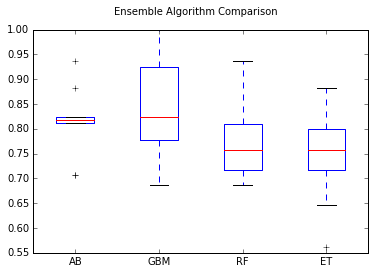

In [38]:
fig = pyplot.figure()
fig.suptitle('Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [ ]:
#GBM.. mean.. and skews upwards.. of 90+ for accuracy

In [ ]:
#SVM still better.. low complexity.. and just a standaridization

In [39]:
# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = SVC(C=1.5)
model.fit(rescaledX, Y_train)
# estimate accuracy on validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.857142857143
[[23  4]
 [ 2 13]]
             precision    recall  f1-score   support

          M       0.92      0.85      0.88        27
          R       0.76      0.87      0.81        15

avg / total       0.86      0.86      0.86        42

